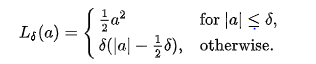

In [16]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.losses import Loss

In [2]:

x = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
y = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)



In [10]:
#implementing huber loss as a function
def my_huber_loss_with_threshold(threshold):
  def my_huber_loss(y_true, y_pred):
    a = y_true - y_pred
    a_smaller = tf.abs(a) <= threshold
    smaller_a_loss = tf.square(a)/2
    bigger_a_loss = threshold * (tf.abs(a) - 0.5 * threshold)
    return tf.where(a_smaller, smaller_a_loss, bigger_a_loss)
  return my_huber_loss



In [11]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer = 'sgd', loss=my_huber_loss_with_threshold(threshold=1))
model.fit(x, y, epochs = 500, verbose=0)


In [13]:
print(model.predict([10]))

[[18.563112]]


In [17]:
#implementing huber loss as a class
class MyHuberLoss(Loss):
  threshold=1
  def __init__(self, threshold):
    super().__init__()
    self.threshold=threshold

  def call(self, y_true, y_pred):
    a = y_true - y_pred
    a_smaller = tf.abs(a) <= self.threshold
    smaller_a_loss = tf.square(a)/2
    bigger_a_loss = self.threshold * (tf.abs(a) - 0.5 * self.threshold)
    return tf.where(a_smaller, smaller_a_loss, bigger_a_loss)




In [18]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer = 'sgd', loss=MyHuberLoss(threshold=1))
model.fit(x, y, epochs = 500, verbose=0)

In [19]:
print(model.predict([10]))

[[18.465803]]
